In [1]:
import pandas as pd

In [8]:
data = pd.read_csv('dataset.csv', encoding ='latin1')
data.head(25)

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
0,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,1,2014,50.00,WFP
1,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,2,2014,50.00,WFP
2,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,3,2014,50.00,WFP
3,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,4,2014,50.00,WFP
4,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,5,2014,50.00,WFP
5,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,6,2014,50.00,WFP
6,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,7,2014,50.00,WFP
7,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,8,2014,50.00,WFP
8,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,9,2014,50.00,WFP
9,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,10,2014,50.00,WFP


In [9]:
import geopandas as gpd

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


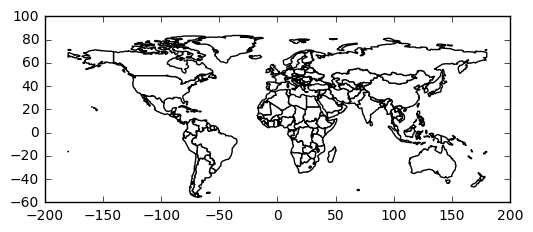

In [21]:
%matplotlib inline
#Get world from geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
#Get rid of Antarctica :/
world = world[(world.pop_est>0) & (world.name!="Antarctica")]
base = world.plot(color='white', edgecolor='black')
world.head()

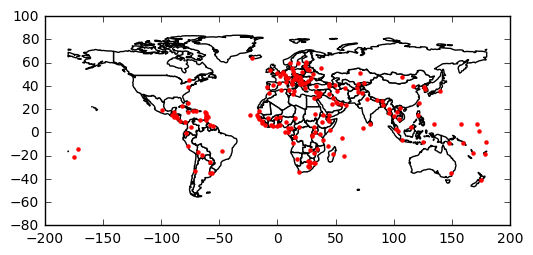

In [24]:
%matplotlib inline

cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
cities.head(10)

base = world.plot(color='white', edgecolor='black')
cities = cities.to_crs(world.crs)
cities.plot(ax=base, marker='o', color='red', markersize=5);

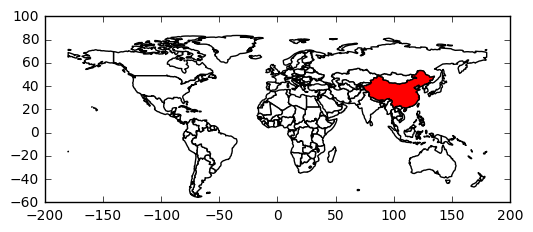

In [33]:
#Testing geopy
%matplotlib inline
china = world[(world.name=="China")]
base = world.plot(color='white', edgecolor='black')
china.plot(ax=base, color='red')

In [39]:
#Trying to get cities..
from geopy.geocoders import Nominatim
geolocator = Nominatim()
location = geolocator.geocode("Badakhshan")
print((location.latitude, location.longitude))

(36.8040254, 71.367658)


In [60]:
#def get_max_price()
x = data[ (data['adm0_name']=='Afghanistan') & (data['mp_year']==2014) & (data['cm_name']=='Bread') ]
max_price = max(x['mp_price'])
min_price = min(x['mp_price'])
print (max_price, min_price)
max_province = x[(x['mp_price']==max_price)]['adm1_name'].unique()
min_province = x[(x['mp_price']==min_price)]['adm1_name'].unique()
print (max_province, min_province)
#Find latitude and longitonal 

55.6 29.4
['Balkh'] ['Hirat']


In [79]:
import numpy as np

In [83]:

countries = data['adm0_name'].unique()


In [99]:
def getCity(food):
    l = []
    for c in countries:
        #print (c)
        x = data[ (data['adm0_name']==c) & (data['mp_year']==2014) & (data['cm_name']==food) ]
        if x.empty:
            continue
        max_price = max(x['mp_price'])
        min_price = min(x['mp_price'])
        #print (max_price, min_price)
        max_province = x[(x['mp_price']==max_price)]['adm1_name'].unique()[0]
        min_province = x[(x['mp_price']==min_price)]['adm1_name'].unique()[0]
        
        #print (max_province, min_province)
        if (not pd.isnull(max_province)) and (not pd.isnull(min_province)):
            print (max_province, min_province)
            if max_province=='Badakhshoni Kuhi':
                continue
            max_province = geolocator.geocode(max_province)
            min_province = geolocator.geocode(min_province)
            
            max_province = (max_province.latitude, max_province.longitude)
            min_province = (min_province.latitude, min_province.longitude)
            l.append((max_province, min_province))
    #print (l)  
    #for maxc, minc in l:
    #    print (maxc, minc)
    return l   
getCity('Bread')        

Balkh Hirat
Tadjourah Djibouti
Central River Lower River
Boke Kankan
Nairobi Nairobi
Naryn Osh
Lagos Oyo
Badakhshoni Kuhi Badakhshoni Kuhi
Jenin Jabalya


[((36.7581256, 66.8980826), (34.3508273, 62.2164003)),
 ((11.7331574, 42.6815878), (11.85677545, 42.7577845199437)),
 ((13.57507385, -14.779714697602), (47.1384787, -53.674386)),
 ((10.952242, -14.2760635), (10.3833686, -9.3047576)),
 ((-1.2832533, 36.8172449), (-1.2832533, 36.8172449)),
 ((40.9399473, 71.8415281), (43.6463558, 0.5850507)),
 ((20.0171109, 103.378253), (8.2151249, 3.5642897)),
 ((32.4618837, 35.297566), (31.9346591, 35.9301164))]

In [89]:
food = data['cm_name'].unique()
#print (food)getCity('Bread')        

In [91]:
print ('Bread: ')
getCity('Bread')
print ()
print ('Wheat:')
getCity('Wheat')        

Bread: 

Wheat:


[('$Daykundi', 'Hirat'),
 ('SNNPR', 'Oromia'),
 ('Sector Autonomo De Bissau', 'Sector Autonomo De Bissau'),
 ('Tamil Nadu', 'Punjab'),
 ('Osh', 'Naryn'),
 ('Gorgol', 'Trarza'),
 ('Mid Western', 'Far Western'),
 ('Balochistan', 'Punjab'),
 ('$East/Iburasirazuba', '$West/Iburengerazuba'),
 ('Districts of Republican Subordination (DRS)', 'Khatlon'),
 ('$Amanat Al Asimah', 'Amran'),
 ('Harare', 'Harare')]